## 1. Постановка задачи
Разработать модель прогнозирования стоимости жилья для агентства недвижимости, которая позволила бы агентству недвижимости обойти конкурентов по скорости и качеству совершения сделок

## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection
from sklearn.datasets import load_diabetes

## Считываем данные, выводим размер выборки

In [2]:
data = pd.read_csv("data.csv")
print('Train data shape: {}'.format(data.shape))


Train data shape: (377185, 18)


In [3]:
data.head()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

In [5]:
data.describe()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103114,377151,377185,336608,377185,285903,377185,226469,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1652,2026,297365,25405,4549,1184,39,347,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


## Смотрим дубликаты и удаляем их

In [6]:
dupl_columns = list(data.columns)

mask = data.duplicated(subset=dupl_columns)
data_duplicates = data[mask]
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')

Число найденных дубликатов: 50


In [7]:
data = data.drop_duplicates()

In [8]:
data.shape

(377135, 18)

## Смотрим пропуски

In [9]:
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

private pool    98.891378
mls-id          93.386453
PrivatePool     89.311520
fireplace       72.659393
stories         39.952272
baths           28.188315
beds            24.196640
MlsId           17.730786
sqft            10.752118
status          10.584274
propertyType     9.209699
target           0.657589
city             0.009015
street           0.000530
dtype: float64

Целевой признак. Удалим данные без цены

In [10]:
data = data.dropna(subset=['target'])
def d_target(target):
    target = target.replace(',','')
    target = target.replace('$','')
    return target

data['target'] = data['target'].apply(d_target)
data['target'] = data['target'].str.extract('(\d+)')
data['target'] = data['target'].astype('int')


In [11]:
data['target'].describe()

count    3.746550e+05
mean     6.447272e+05
std      1.841386e+06
min      1.000000e+00
25%      1.869900e+05
50%      3.200000e+05
75%      5.820000e+05
max      1.950000e+08
Name: target, dtype: float64

По пропускам напрашивается удаление "private pool", но мы его объединим с "PrivatePool". И оставшиеся пропуски идентифицируем, как отсутствие бассейна.
Также "mls-id" объединим с "MlsId".
Пропуски "fireplace" идентифицируем, как отсутствие камина.

# Статус

In [12]:
print('Уникальных значений статуса: {:}'.format(data['status'].nunique()))

Уникальных значений статуса: 156


переведем в строку и нижний регистр

In [13]:
data['status'] = data['status'].astype('str')
data['status'] = data['status'].str.lower()

In [14]:
print('Уникальных значений статуса: {:}'.format(data['status'].nunique()))

Уникальных значений статуса: 150


150 уникальных статусов. Посмотрим самые многочисленные

In [15]:
data['status'].value_counts()[0:11]

status
for sale                     199520
active                       105206
nan                           39256
foreclosure                    6020
new construction               5458
pending                        4802
pre-foreclosure                2000
p                              1488
pre-foreclosure / auction      1281
under contract show            1183
 / auction                      799
Name: count, dtype: int64

Выделим их в 6 категорий: 

In [16]:
def status_6(status):
    if 'sale' in status:
        return 'sale'
    if 'active' in status:
        return 'active'
    if 'foreclos' in status:
        return 'foreclosure'
    if 'new construction' in status:
        return 'new'
    if 'pending' in status:
        return 'pending'
    return 'other'

data['status'] = data['status'].apply(status_6)


In [17]:
data['status'].value_counts()

status
sale           199583
active         106554
other           48141
foreclosure      9597
new              5458
pending          5322
Name: count, dtype: int64

в 'other' вошли и пропуски

# тип объекта недвижимости

In [18]:
data['propertyType'] = data['propertyType'].astype('str')
data['propertyType'] = data['propertyType'].str.lower()

In [19]:
data['propertyType'].value_counts()[0:25]

propertyType
single-family home               91370
single family                    61886
condo                            42368
nan                              34554
single family home               31725
lot/land                         20506
townhouse                        18344
land                             10933
multi-family                      7895
condo/townhome/row home/co-op     7701
traditional                       5912
coop                              3264
multi family                      2771
high rise                         1823
ranch                             1781
detached, one story               1614
mobile/manufactured               1613
single detached, traditional      1581
contemporary                      1556
multi-family home                 1501
1 story                           1235
colonial                          1204
mobile / manufactured             1056
contemporary/modern               1000
2 stories                          911
Name: count,

In [20]:
data = data.drop(data[data['propertyType'] == 'apartment'].index) # эта категория не продается, удаляем


выделяем типы

In [21]:
def d_type(type):
    if 'contempor' in type or 'modern' in type:
        return 'modern'                                                                         
    if 'multi' in type or 'townhous' in type:
        return 'townhouse'
    if 'family' in type or 'detached' in type or 'tiny' in type or '1' in type or 'one' in type:
        return 'family'
    if 'land' in type:
        return 'land'
    if 'condo' in type and 'townho' in type:
        return 'condhome'
    if 'condo' in type:
        return 'condo'
    if 'coop' in type:
        return 'cooperative'
    if 'ranch' in type:
        return 'ranch'
    if 'mobil' in type:
        return 'mobile'
    if 'traditional' in type or 'colonial' in type or '2' in type or 'two' in type:
        return 'house'

    return 'other'
    

data['propertyType'] = data['propertyType'].apply(d_type)

In [22]:
data[data['propertyType'] == 'land'].isnull().sum()

status              0
private pool    31446
propertyType        0
street              2
baths           27134
homeFacts           0
fireplace       30457
city               25
schools             0
sqft            16431
zipcode             0
beds            28843
state               0
stories         28881
mls-id          31446
PrivatePool     31118
MlsId              28
target              0
dtype: int64

In [23]:
data = data.drop(data[data['propertyType'] == 'land'].index) # эта категория во-первых не жилье, во-вторых, пропуски по многим критериям. Удаляем

In [24]:
data['propertyType'].value_counts()

propertyType
family         193470
other           42833
condo           42653
townhouse       30828
house            9751
condhome         8225
modern           4768
cooperative      3797
mobile           3464
ranch            2623
Name: count, dtype: int64

# Бассейн
бассейн у нас идет в 2 полях 'private pool' и 'PrivatePool'

In [25]:
data['private pool'].value_counts()

private pool
Yes    4149
Name: count, dtype: int64

In [26]:
data['PrivatePool'].value_counts()

PrivatePool
yes    28314
Yes    11425
Name: count, dtype: int64

сделаем на их основании 1 бинарный признак: 1 - есть бассейн, 0 - нет бассейна

In [27]:
def pool(pool1, pool2):
    if (pool1 == 'Yes') | (pool2 == 'yes') | (pool2 == 'Yes'):
        return 1
    return 0

data['pool'] = data.apply(lambda x: pool(x['private pool'], x['PrivatePool']), axis=1)

In [28]:
data['pool'].value_counts().sum()

342412

удаляем ненужные признаки

In [29]:
data = data.drop(['private pool', 'PrivatePool'] ,axis=1)

# Наличие ванных комнат 'baths'

In [30]:
data['baths'].value_counts()

baths
2 Baths       51638
3 Baths       35253
2             20411
2.0           16344
4 Baths       14659
              ...  
25 Baths          1
4.75 Baths        1
5.25 Baths        1
41.0              1
44.0              1
Name: count, Length: 224, dtype: int64

In [31]:
#data['bs'] = data['baths'].fillna(0)
data['baths'] = data['baths'].str.extract('(\d+)')
#data['baths'] = data['baths'].astype('int')

In [32]:
data['baths'] = data['baths'].fillna(0)
data['baths'] = data['baths'].astype('int')

In [33]:
data['baths'].value_counts()

baths
2      118505
0       79364
3       72436
4       27729
1       24835
5        9939
6        4468
7        2152
8        1183
9         548
10        341
750       237
11        189
12        137
13         73
16         52
14         46
18         32
15         28
24         17
20         15
22         10
17         10
26          8
23          8
30          6
27          5
40          4
21          4
36          3
44          3
19          3
32          3
29          2
34          2
28          2
60          1
39          1
64          1
42          1
43          1
41          1
25          1
55          1
241         1
76          1
116         1
35          1
68          1
Name: count, dtype: int64

больше 100 - явно перебор, заменяем на 0

In [34]:
data['baths'] = data['baths'].apply(lambda x: 0 if x > 100 else x)

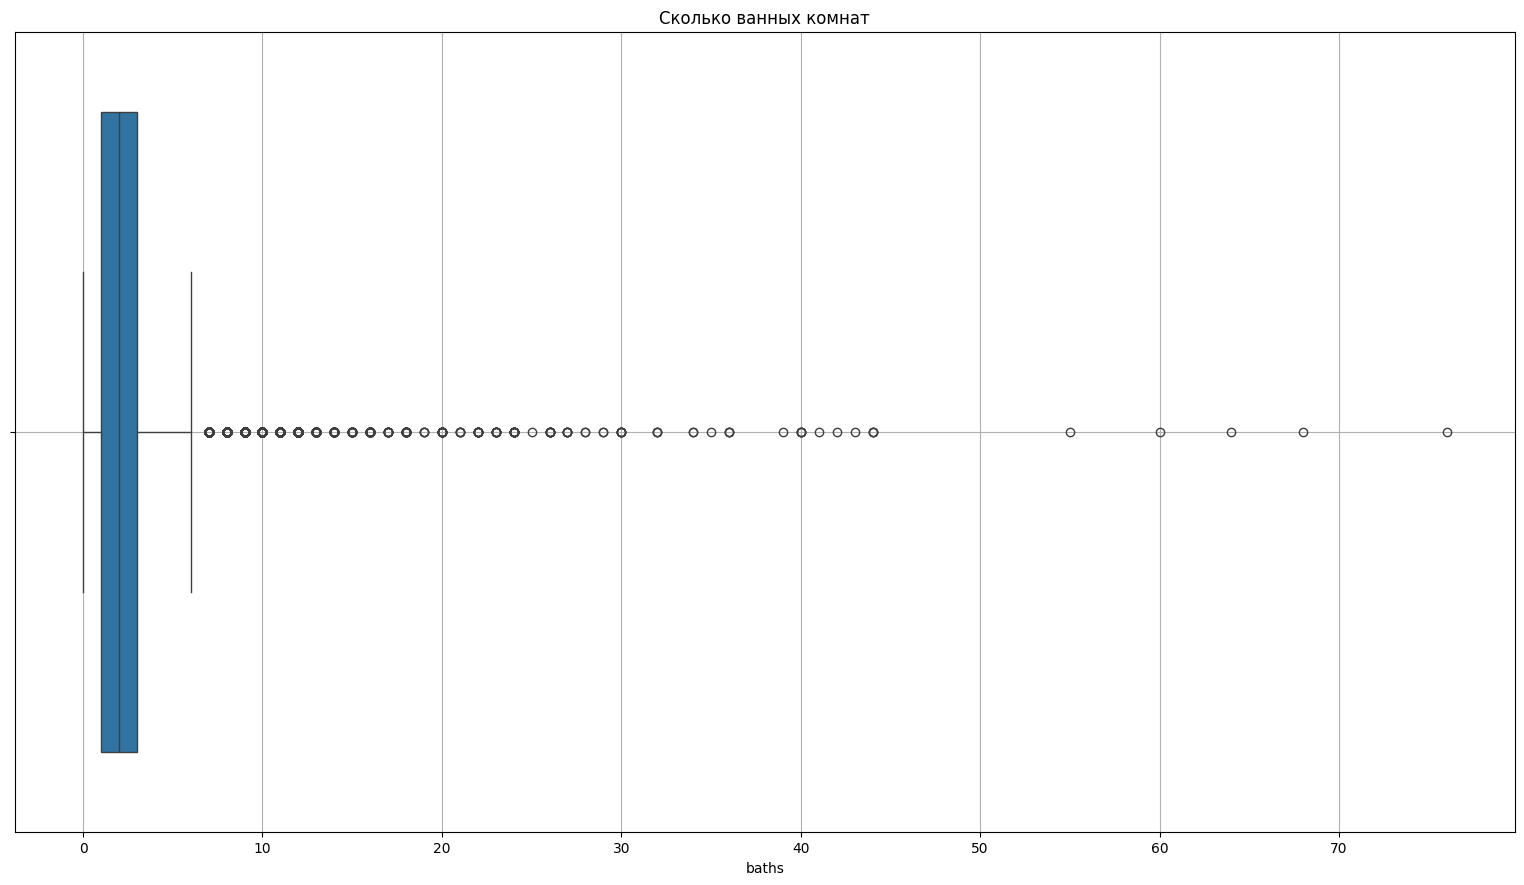

In [35]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(15, 8)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=data, x='baths', ax=ax) 
# задаём подпись к графику
ax.set_title('Сколько ванных комнат')
# задаём отображение сетки
ax.grid(True);

больше 6 ванн тоже выбросы - заменяем пока на 0.

In [36]:
data['baths'] = data['baths'].apply(lambda x: 0 if x > 6 else x)

0 ванных заменяем медианой

In [37]:
data['baths'][data['baths'] == 0] = np.nan
data['baths'] = data['baths'].fillna(data['baths'].median())
data['baths'] = data['baths'].astype('int')
data['baths'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_11884\2472989355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['baths'][data['baths'] == 0] = np.nan


0

In [38]:
data['baths'].value_counts()

baths
2    203005
3     72436
4     27729
1     24835
5      9939
6      4468
Name: count, dtype: int64

# Камины

In [39]:
data['fireplace'].value_counts()[0:30]

fireplace
yes                          49037
Yes                          20608
1                            14533
2                             2431
Not Applicable                1990
Fireplace                      847
3                              563
Living Room                    433
LOCATION                       399
Wood Burning                   311
Gas/Gas Logs                   300
Fireplace YN                   287
Special Features               278
1 Fireplace                    274
0                              270
No                             265
FAMILYRM                       246
Fireplace Features             239
Great Room                     207
Wood                           206
Gas Logs, Great Room           188
Ceiling Fan                    186
Living Room, Wood Burning      185
4                              184
Family Room, Wood Burning      149
FAMILYRM, Gas Logs             146
Gas                            134
Gas Logs, In Great Room        112
Gas Logs  

мы видим, что если поле заполнено (за исключением слов 'no', 'not', '0'), значит камин есть

In [40]:
data['fireplace'] = data['fireplace'].fillna(0)

In [41]:
data['fireplace'] = data['fireplace'].astype('str')
data['fireplace'] = data['fireplace'].str.lower()

0 - камина нет, 1 - камин есть

In [42]:
def fire(slovo):
    if 'no' in slovo or 'not' in slovo or '0' in slovo:
        return 0
    return 1

data['fireplace'] = data['fireplace'].apply(fire)


# Город

In [43]:
data = data.dropna(subset=['city'])
data.groupby('city')['city'].count()

city
                     20
--                    9
ALTAMONTE SPRINGS     2
ANN ARBOR             1
APOPKA                4
                     ..
Yuba City            44
Zanesville            4
Zionsville            9
mcallen               1
the Hills             5
Name: city, Length: 1908, dtype: int64

убираем города "пробелы" и "--"

In [44]:
def d_city(city):
    city = city.replace(' ','')
    city = city.replace('-','')
    return city
data['city'] = data['city'].astype('str')
data['city'] = data['city'].str.lower()
data['city'] = data['city'].apply(d_city)
data = data[data['city'] != '']


In [45]:
print('Уникальных значений город: {:}'.format(data['city'].nunique()))

Уникальных значений город: 1779


In [46]:
data.shape

(342374, 17)

In [47]:
data['city'].value_counts()[0:30]

city
houston            23243
miami              15272
sanantonio         15023
jacksonville        9487
dallas              8459
newyork             6806
brooklyn            6771
orlando             6727
chicago             6353
tampa               6264
charlotte           6084
lasvegas            5621
fortworth           5231
fortlauderdale      5044
austin              4920
nashville           4541
washington          4500
cleveland           4247
philadelphia        4182
losangeles          3827
seattle             3819
kissimmee           3692
atlanta             3630
detroit             2976
miamibeach          2604
denver              2566
saintpetersburg     2448
ocala               2409
raleigh             2376
memphis             2361
Name: count, dtype: int64

# Штат

In [48]:
data.groupby('state')['state'].nunique().sum()

37

In [49]:
data['state'] = data['state'].str.lower()                  # приводим к нижнему регистру

In [50]:
print('Уникальных значений штат: {:}'.format(data['state'].nunique()))
#data.groupby('state')['state'].nunique().sum()

Уникальных значений штат: 36


# Почтовый индекс

In [51]:
data['zipcode'].value_counts(ascending=True)[:25]

zipcode
44704         1
61761         1
27701-3539    1
27603-2692    1
07004-1300    1
20853         1
27606-4852    1
90278         1
27603-4175    1
78540         1
4667          1
24637         1
27616-6802    1
48505         1
27608-1466    1
27704-5037    1
60426         1
27613-1450    1
27613-6945    1
41666         1
43065         1
05457         1
28103         1
32068         1
48165         1
Name: count, dtype: int64

In [52]:
data['zipcode'] = data['zipcode'].str.extract('(\d+)')
data = data.dropna(subset=['zipcode'])
data['zipcode'] = data['zipcode'].astype('int')

# 'mls-id' и 'MlsId' - дублирующие друг друга признаки, приоритетным возьмем 'MlsId', так как в нем меньше пропусков

In [53]:
data['mls-id'] = data['mls-id'].fillna('0')
data['MlsId'] = data['MlsId'].fillna('0')

In [54]:
def d_Id(Id1, Id2):
    if Id1 != '0':
        return Id1
    if Id2 != '0':
        return Id2
    return '0'

data['MlsId'] = data.apply(lambda x: d_Id(x['MlsId'], x['mls-id']), axis=1)

In [55]:
data['MlsId'].value_counts()[:25]

MlsId
0                             39390
NO MLS                           24
No MLS #                         16
 A, Houston, TX 77008            13
No                               12
 12A, Orlando, FL 32833          11
 B, Houston, TX 77008             9
No mls                            9
 1, South Boston, MA 02127        9
 11A, Orlando, FL 32833           8
 2, Washington, DC 20002          8
 B, Houston, TX 77007             8
 2, Washington, DC 20010          7
 1, Washington, DC 20002          7
 3A, Orlando, FL 32833            6
 1A, Orlando, FL 32833            6
 0, Doral, FL 33178               6
2101941                           6
 2, Washington, DC 20009          6
 2, Washington, DC 20001          6
 2, Boston, MA 02129              6
 A, Austin, TX 78704              6
No MLS                            6
 A, Austin, TX 78721              6
 1, Washington, DC 20001          6
Name: count, dtype: int64

убираем где 'no mls' и где нет никокого MlsId - значит этот объект не привязан к агентству недвижимости и смысла в нем нет.

In [56]:
data['MlsId'] = data['MlsId'].astype('str')
data['MlsId'] = data['MlsId'].str.lower()
data = data[(data['MlsId'] != 'nan')  & (data['MlsId'] != 'no mls') & (data['MlsId'] != '0') & (data['MlsId'] != 'no ') & (data['MlsId'] != 'no mls #')]
data = data.drop('mls-id' ,axis=1)

# Этажи 'stories'

In [57]:
data['stories'].value_counts()[:25]

stories
1.0              54382
2.0              44262
1                19020
2                15150
3.0               9691
0.0               6759
One               5758
0                 3990
3                 3673
9.0               2877
2.00              2775
Two               2495
2 Story           1970
4.0               1896
1 Story           1253
1.00              1199
3+                 868
4                  850
1.50               650
Three Or More      569
5.0                529
6.0                528
3.00               517
9                  456
One Story          395
Name: count, dtype: int64

In [58]:
data['stories'] = data['stories'].astype('str')

data['stories'] = data['stories'].str.lower()

def d_stories(x):
    if 'one' in x:
        return '1'
    if 'two' in x:
        return '2'
    if 'three' in x:
        return '3'
    return x
    
data['stories'] = data['stories'].apply(d_stories)
data['stories'] = data['stories'].str.extract('(\d+)')
data['stories'] = data['stories'].fillna(0)  
data['stories'] = data['stories'].astype('int')


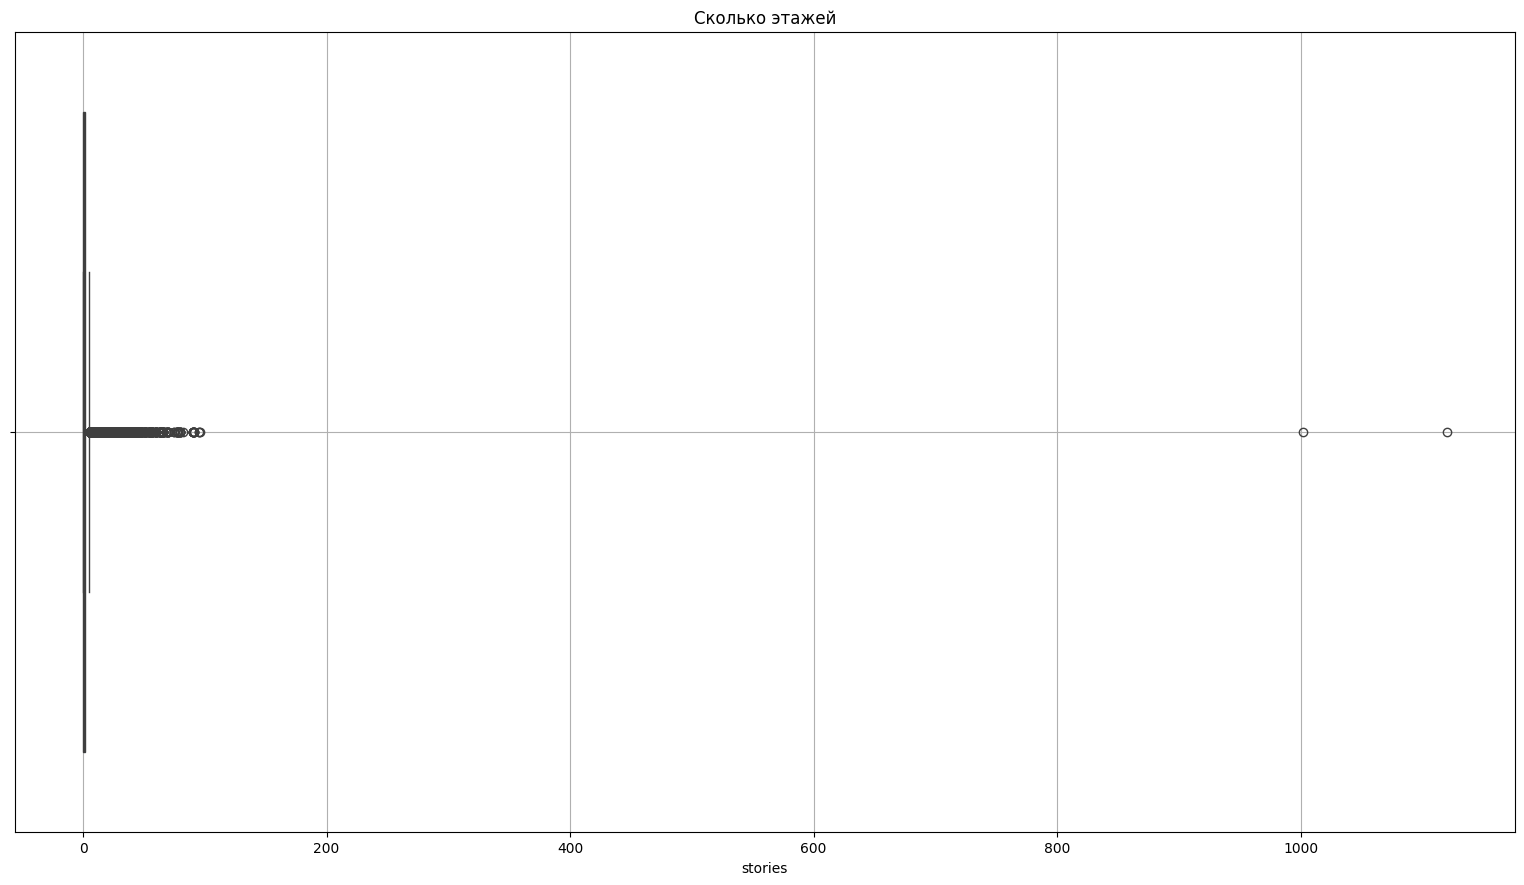

In [59]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(15, 8)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=data, x='stories', ax=ax) 
# задаём подпись к графику
ax.set_title('Сколько этажей')
# задаём отображение сетки
ax.grid(True);

есть 2 явных выброса, удаляем их

In [60]:
data = data[data['stories'] < 200]

In [61]:
data['stories'].value_counts()

stories
0     124959
1      84439
2      68171
3      15671
9       3333
       ...  
75         2
95         2
82         1
96         1
65         1
Name: count, Length: 75, dtype: int64

In [62]:
data['stories'].isnull().sum()

0

# школы

In [63]:
data['schools'].value_counts()[0:30]

schools
[{'rating': [], 'data': {'Distance': [], 'Grades': []}, 'name': []}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   2926
[{'rating': ['4/10', '5/10', '6/10'], 'data': {'Distance': ['39.69mi', '39.69mi', '39.69mi'], 'Grades': ['9-12', '6-8', 'PK-5']}, 'name': ['Fort Hancock High School', 'Fort Hancock Middle School', 'Benito Martinez Elementary School']}]                                                                                                                                                                                                                         

составляем рейтинг школ

In [64]:
import re
number = ['0','1','2','3','4','5','6','7','8','9','10']
def d_schols(stroka):
    spis_rating = []
    pred_i = " "
    delim = "'/, "
    stroka_r = re.split("|".join(delim), stroka)
    for i in stroka_r:
        if i == ']':
            return spis_rating
        if pred_i == '' or pred_i == '[':
            if i in number:
                i = int(i)
                spis_rating.append(i)
        pred_i = i 
    return spis_rating              
            
df = pd.DataFrame(data['schools'].apply(d_schols))            
    


сколько среднее количество рейтингов

In [65]:
mean_number = int(df['schools'].apply(lambda x : len([y for y in x])).mean())
mean_number

3

In [66]:
#df= pd.json_normalize(df['schools']) #функция разбивает списки по столбцам
df = pd.DataFrame(df['schools'].tolist(), index=df.index)

берем минимальные и максимальные рейтинги

In [67]:
df['rat_min'] = df.min(axis=1)
df['rat_max'] = df.max(axis=1)
df_mm = df[['rat_min', 'rat_max']]
df_mm = df_mm.fillna(0)
df_mm['rat_min'] = df_mm['rat_min'].astype(int)
df_mm['rat_max'] = df_mm['rat_max'].astype(int)

соеденим таблицы и убираем столбец 'schools'

In [68]:
data = pd.concat([data,df_mm],axis=1).drop('schools',axis=1)

# homeFacts

In [69]:
data['homeFacts'].value_counts()[:25]

homeFacts
{'atAGlanceFacts': [{'factValue': '', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '—', 'factLabel': 'lotsize'}, {'factValue': None, 'factLabel': 'Price/sqft'}]}                                       7133
{'atAGlanceFacts': [{'factValue': None, 'factLabel': 'Year built'}, {'factValue': None, 'factLabel': 'Remodeled year'}, {'factValue': None, 'factLabel': 'Heating'}, {'factValue': None, 'factLabel': 'Cooling'}, {'factValue': None, 'factLabel': 'Parking'}, {'factValue': None, 'factLabel': 'lotsize'}, {'factValue': None, 'factLabel': 'Price/sqft'}]}                            2923
{'atAGlanceFacts': [{'factValue': '', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLab

полезный признак - площадь участка
мы его выразим в акрах

In [70]:
def d_akr(stroka):
    delim = ", '"
    pred_i = 0
    flag = 0
    stroka = stroka.replace(',','').lower()
    stroka_r = re.split("|".join(delim), stroka)
    for i in stroka_r:
     #   i = i.lower()
        if i == 'parking':
            flag = 1
        if flag == 1:
            if pred_i > 0:
                if 'acr' in i:
                    return pred_i
                else:   
                    return pred_i/43560  # перевод в акры
            try:
                float(i)
                pred_i = float(i)
            except Exception:
                pass
            try:
                int(i)    
                pred_i = float(i)
            except Exception:
                pass
           
        if i == 'lotsize':
            return 0
        
             
    return 0              
            
data['akr'] = data['homeFacts'].apply(d_akr)


цена

In [71]:
def d_price(stroka):
    delim = ", '"
    pred_i = 0
    flag = 0
    stroka = stroka.replace(',','').lower()
    stroka_r = re.split("|".join(delim), stroka)
    for i in stroka_r:
        if i == 'lotsize':
            flag = 1
        if flag == 1:
            if '$' in i:
                i = re.search(r"(\d+)",i)
                i = i[0]
                try:
                    float(i)
                    i = float(i)
                except Exception:
                    pass
                try:
                    int(i)    
                    i = float(i)   
                except Exception:
                    pass
                if i > 0:
                    return i
    return 0              
            
data['price'] = data['homeFacts'].apply(d_price)

In [72]:

data = data.drop('homeFacts',axis=1) # удаляем столбец

# количество спален

In [73]:
data['beds'].value_counts()[0:25]

beds
3 Beds    44117
4 Beds    28274
3         26038
2 Beds    22961
4         16612
Baths     15256
2         14156
3 bd       9755
5 Beds     9578
3.0        8084
4 bd       6323
5          5660
4.0        5231
2 bd       4280
1          4218
6 Beds     3214
2.0        2428
5 bd       2178
6          1624
5.0        1371
0          1089
1 bd        949
7 Beds      930
Bath        707
8 Beds      639
Name: count, dtype: int64

In [74]:
data['beds'] = data['beds'].str.extract('(\d+)')
#data['beds'] = data['beds'].fillna(data['beds'].median())
data['beds'] = data['beds'].fillna(0)
data['beds'] = data['beds'].astype('int')
#data['beds'][data['baths'] == 0] = np.nan

#data['beds'] = data['beds'].astype('int')
data['beds'].value_counts()[0:30]

beds
3     88122
0     78748
4     56573
2     44015
5     19068
1      5969
6      5875
7      1805
8      1186
9       493
10      370
12      156
11      121
16       62
14       44
13       42
15       35
18       31
24       28
20       21
17       13
22       10
28        9
26        9
23        8
19        7
40        6
21        6
34        6
32        6
Name: count, dtype: int64

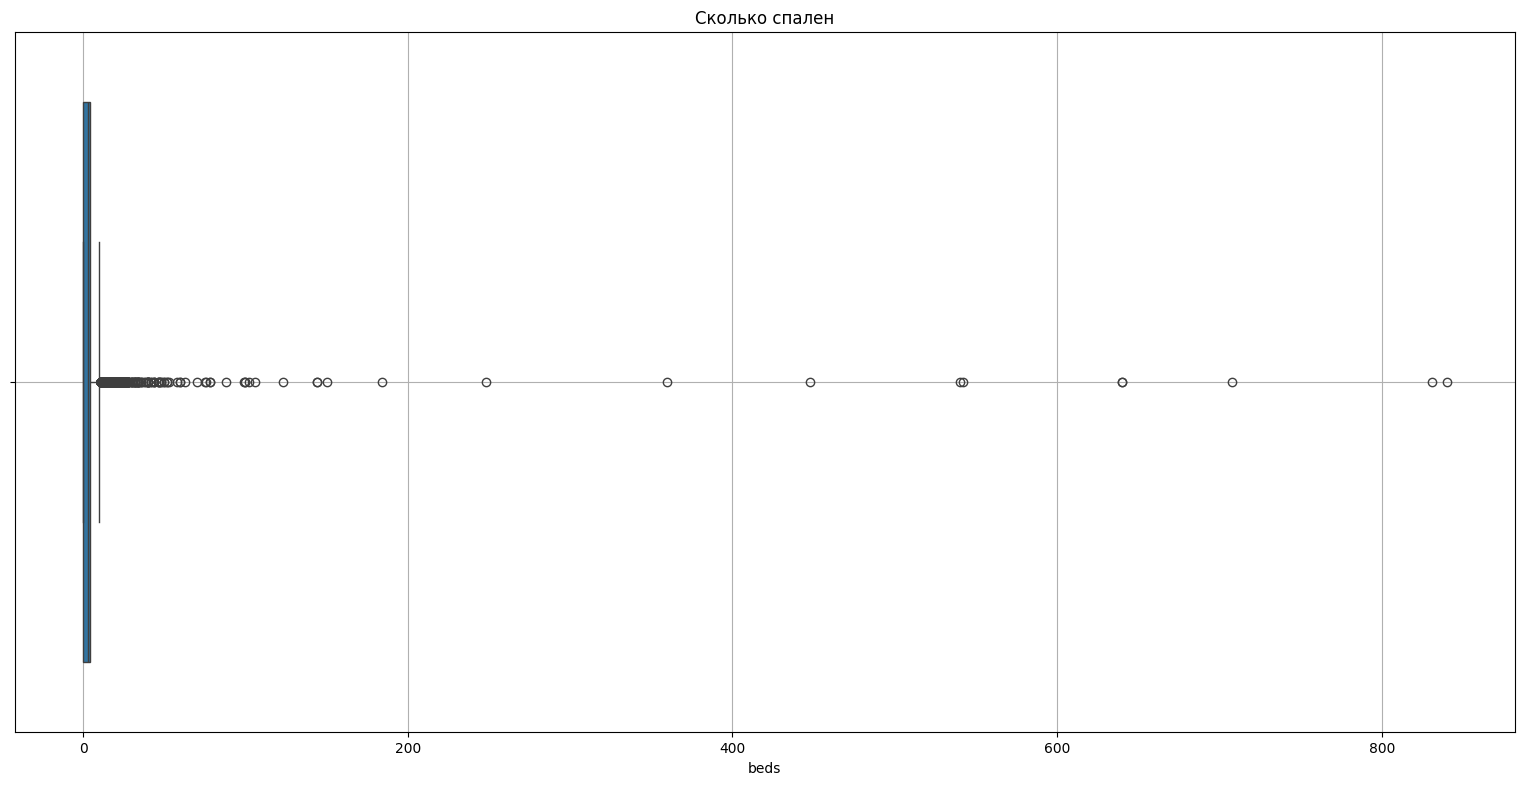

In [75]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(15, 7)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=data, x='beds', ax=ax) 
# задаём подпись к графику
ax.set_title('Сколько спален')
# задаём отображение сетки
ax.grid(True);

больше 200 удаляем

In [76]:
#data['beds'] = data['beds'].apply(lambda x: 0 if x > 200 else x)
data = data[data['beds'] < 200]

смотрим в разрезе стоимости жилья

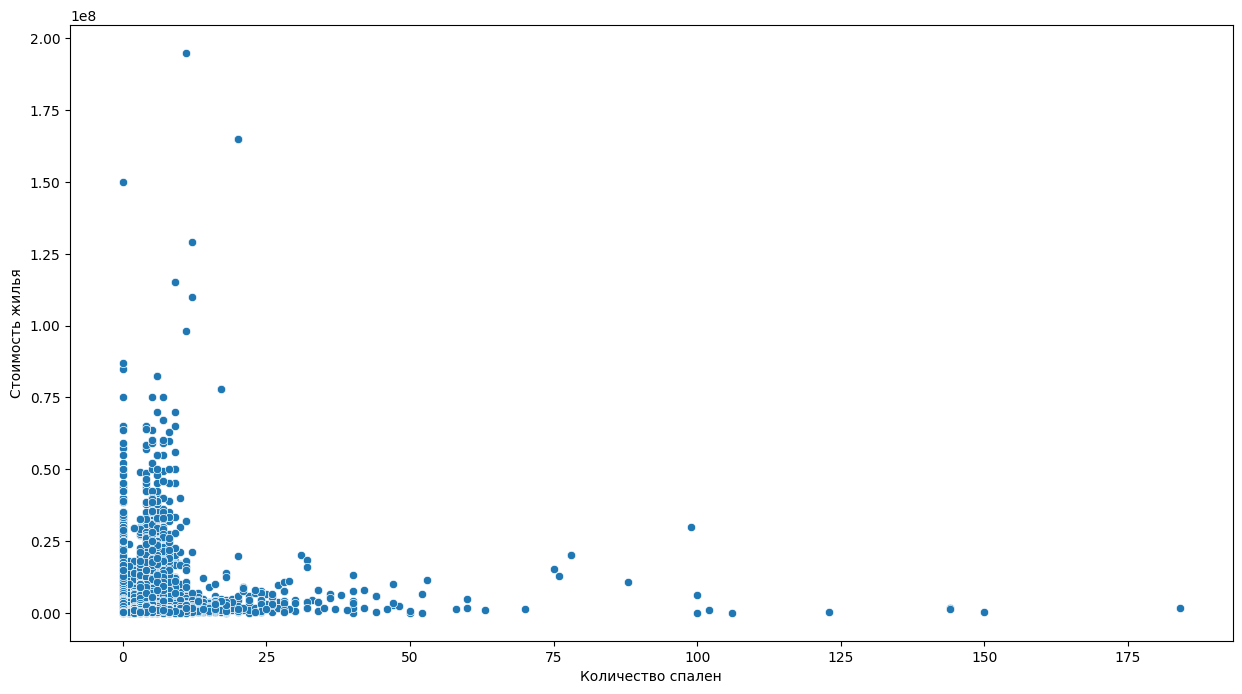

In [77]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x=data['beds'], y=data['target'], ax=ax)
ax.set_xlabel('Количество спален')
ax.set_ylabel('Стоимость жилья');

больше 50 удаляем, нулевые тоже

In [78]:
data = data[(data['beds'] > 0) & (data['beds'] < 50) ]


In [79]:
data['beds'].value_counts()

beds
3     88122
4     56573
2     44015
5     19068
1      5969
6      5875
7      1805
8      1186
9       493
10      370
12      156
11      121
16       62
14       44
13       42
15       35
18       31
24       28
20       21
17       13
22       10
28        9
26        9
23        8
19        7
34        6
32        6
40        6
21        6
27        5
25        4
30        4
47        3
44        3
42        2
29        2
36        2
48        2
31        1
38        1
33        1
37        1
39        1
46        1
35        1
Name: count, dtype: int64

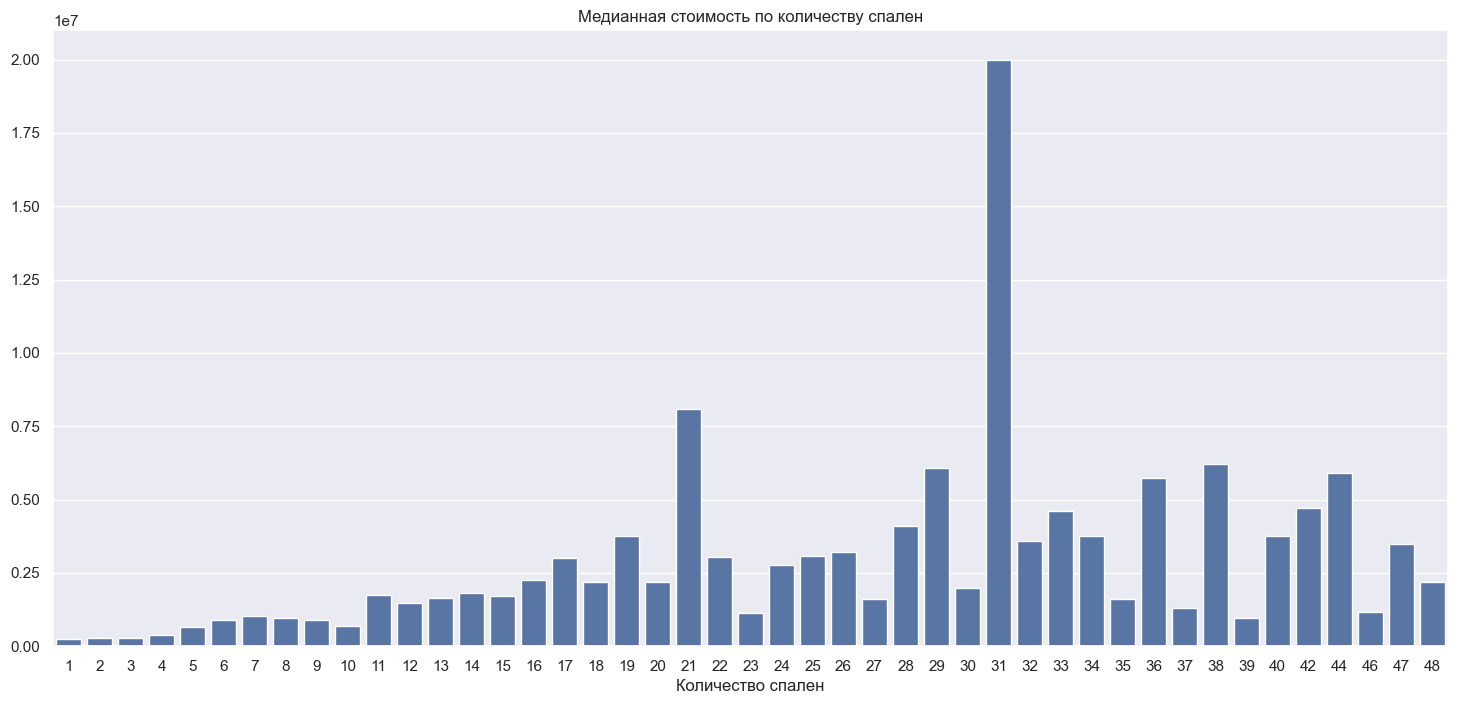

In [80]:
data_s = data.groupby('beds')['target'].median() 
sns.set()
ax = plt.subplots(figsize=(18, 8))
f = sns.barplot(y = data_s.values, x=data_s.index)
f.set(title = "Медианная стоимость по количеству спален",
      xlabel = "Количество спален",
      ylabel = "")
plt.show()

In [81]:
#data['beds'][data['beds'] == 0] = np.nan
#data['beds']= data['beds'].fillna(data['beds'].median())
data['beds'] = data['beds'].astype('int')

# площадь

In [82]:
data['sqft'].isnull().sum()

3966

In [83]:
def d_sqft(sqft):
    sqft = sqft.replace(',','')
    return sqft
data['sqft'] = data['sqft'].astype('str')
data['sqft'] = data['sqft'].apply(d_sqft)
data['sqft'] = data['sqft'].str.extract('(\d+)')
data = data.dropna(subset=['sqft'], axis=0)
data['sqft'] = data['sqft'].astype('int')

data = data[data['sqft'] > 0]


In [84]:
data['sqft'].value_counts()

sqft
1200     1021
1500      770
1800      721
1400      700
1100      671
         ... 
12002       1
6668        1
6592        1
7534        1
6193        1
Name: count, Length: 8357, dtype: int64

In [85]:
data['sqft'].describe()

count    2.187760e+05
mean     6.103665e+03
std      1.701790e+06
min      1.000000e+00
25%      1.334000e+03
50%      1.862000e+03
75%      2.658000e+03
max      7.959794e+08
Name: sqft, dtype: float64

In [86]:
data.sort_values(by = 'sqft',ascending=False)[0:20]

,status,propertyType,street,baths,fireplace,city,sqft,zipcode,beds,state,stories,MlsId,target,pool,rat_min,rat_max,akr,price
62736,sale,family,1723 Pulte St,2,1,cincinnati,795979430,45225,2,oh,1,1230095,27500,0,1,9,0.065978,0.0
106278,sale,cooperative,185 Clinton Ave APT 1A,1,0,brooklyn,651914,11205,1,ny,14,19673286,449000,0,4,7,0.000000,1.0
112552,sale,cooperative,209 Clinton Ave #3H,2,0,brooklyn,651914,11205,2,ny,14,1860110,695000,0,6,6,1.890000,1.0
217027,sale,cooperative,209 Clinton Ave APT 3H,1,0,brooklyn,651914,11205,2,ny,14,1860110,695000,0,4,7,0.000000,1.0
214436,sale,cooperative,2942 W 5th St #3H,2,0,brooklyn,623806,11224,2,ny,9,10678734,344900,0,3,9,4.680000,0.0
211260,sale,cooperative,300 Central Park W #3C,3,0,newyork,608532,10024,3,ny,29,5603963,3175000,0,5,5,0.910000,5.0
179668,sale,cooperative,211 Central Park W #19E,4,0,newyork,600613,10024,5,ny,20,00114150,24000000,0,9,9,0.930000,40.0
366407,sale,family,61-35 98th St #1J,2,0,regopark,580800,11374,3,ny,0,3158817,539888,0,5,8,4.230000,0.0
155454,sale,cooperative,205 W End Ave #25D,2,0,newyork,566824,10023,2,ny,28,5943612,1495000,0,9,9,2.080000,3.0
345202,sale,cooperative,2141 34th Ave #8B,2,0,astoria,563800,11106,2,ny,0,3177420,469999,0,2,8,10.330000,1.0


первая позиция выглядят как явны1 выброс

In [87]:
data = data[data['sqft'] < 1000000]

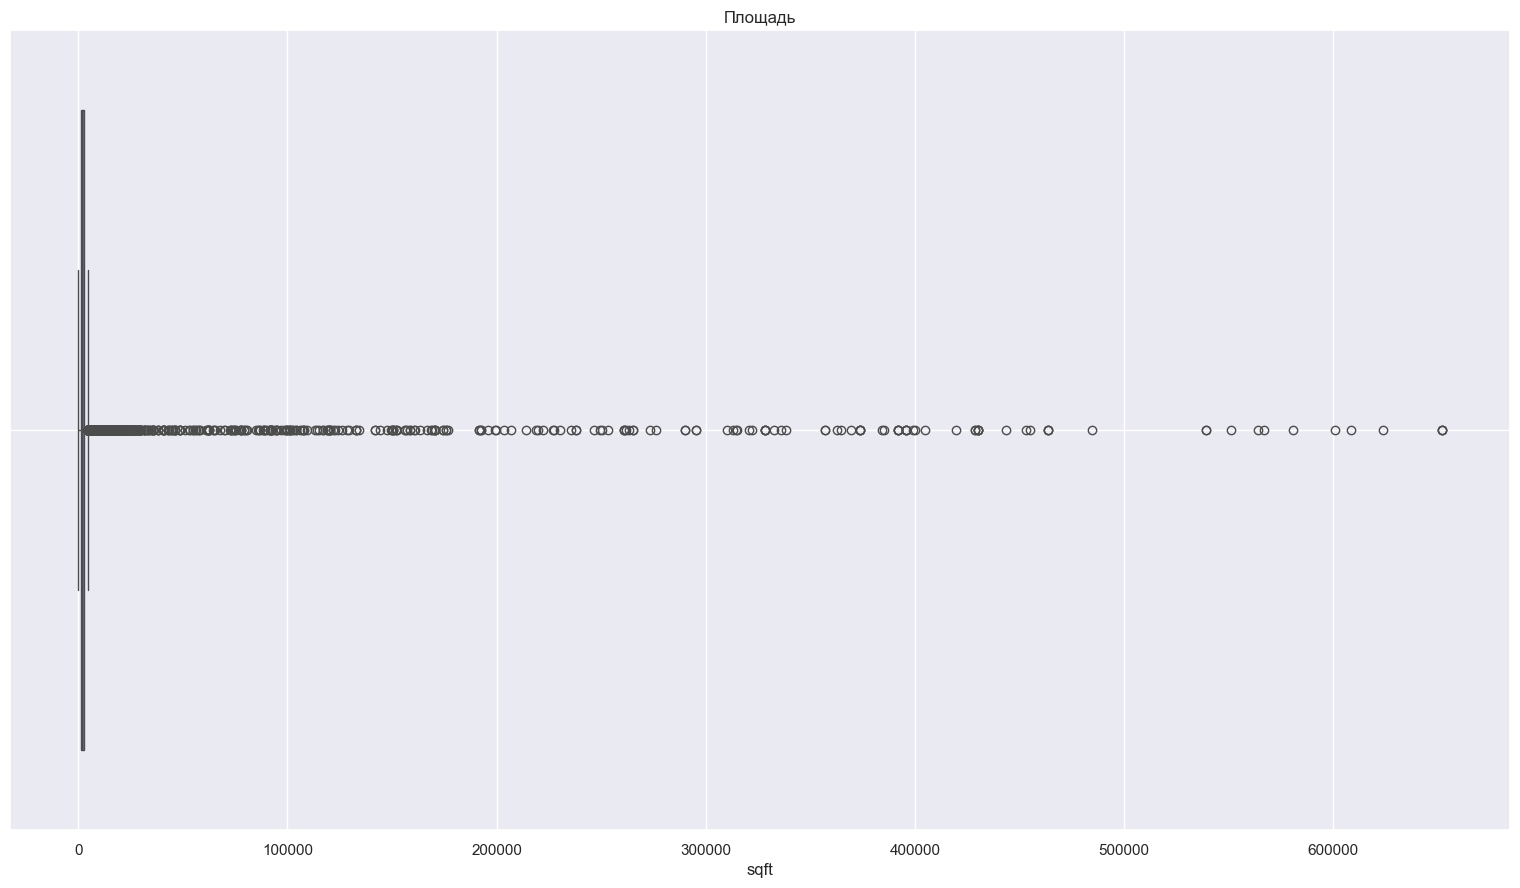

In [88]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(15, 8)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=data, x='sqft', ax=ax) 
# задаём подпись к графику
ax.set_title('Площадь')
# задаём отображение сетки
ax.grid(True);

Text(0.5, 1.0, 'Зависимость стоимости от площади')

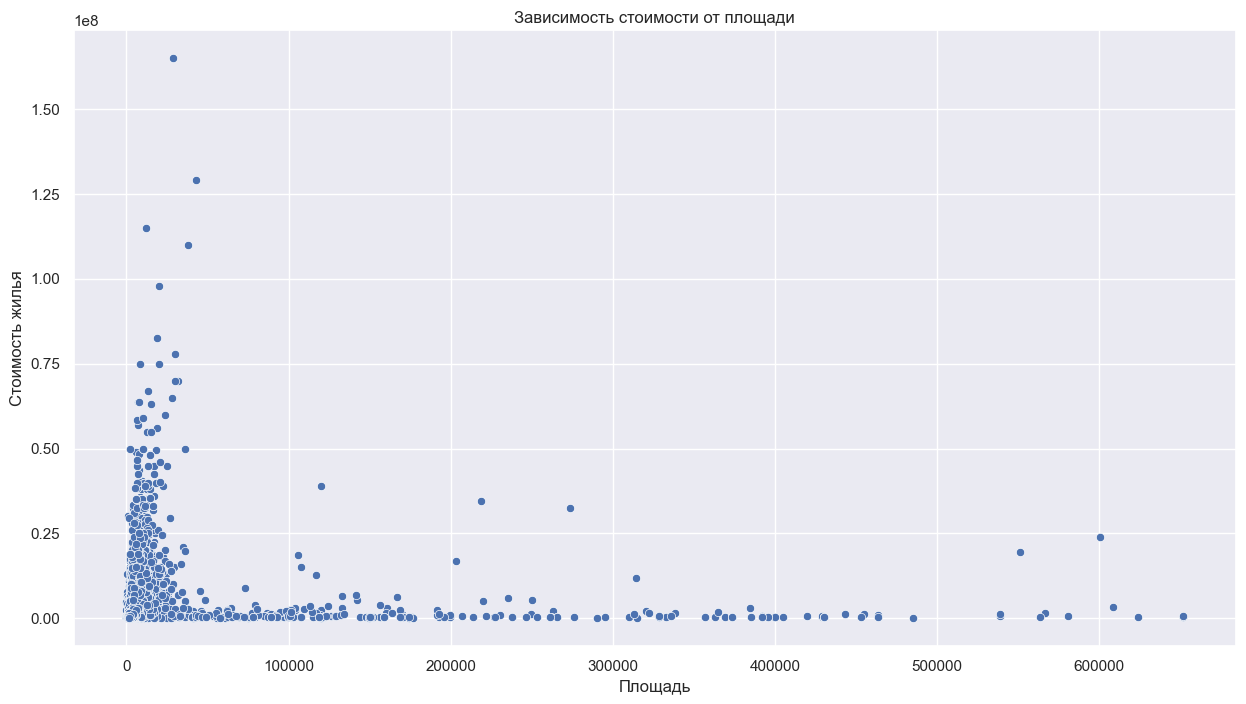

In [89]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x=data['sqft'], y=data['target'], ax=ax)
ax.set_xlabel('Площадь')
ax.set_ylabel('Стоимость жилья')
ax.set_title('Зависимость стоимости от площади')

После 180000 кв.футов огромная площадь практически равна 0. Убираем их

In [90]:
data = data[data['sqft'] < 180000]

Text(0.5, 1.0, 'Зависимость стоимости от площади')

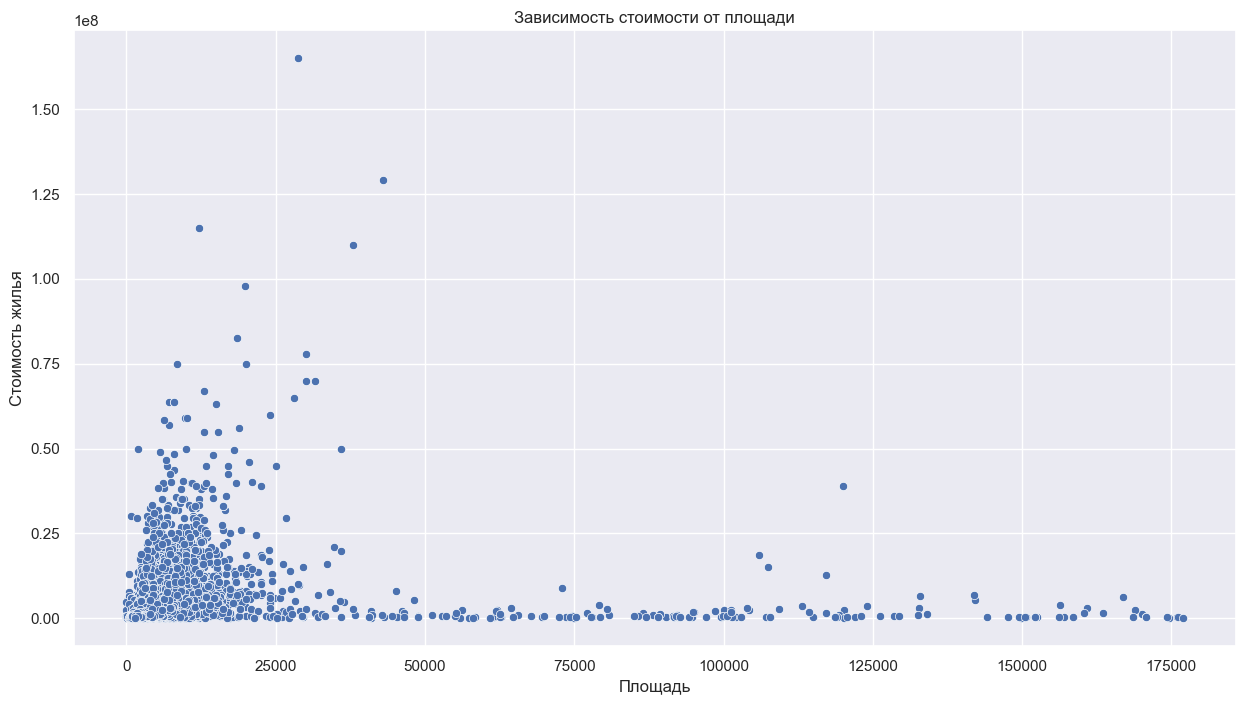

In [91]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x=data['sqft'], y=data['target'], ax=ax)
ax.set_xlabel('Площадь')
ax.set_ylabel('Стоимость жилья')
ax.set_title('Зависимость стоимости от площади')

После 50000 кв.футов огромная площадь практически равна 0. Убираем их

In [92]:
data.shape

(218678, 18)

## 3. Разведывательный анализ данных (EDA)

частично он произведен в модуле 2, продолжим

# Целевой признак

приведем к логарифму

In [93]:
data['target_log'] = np.log(data['target']+1)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218678 entries, 0 to 377184
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        218678 non-null  object 
 1   propertyType  218678 non-null  object 
 2   street        218678 non-null  object 
 3   baths         218678 non-null  int32  
 4   fireplace     218678 non-null  int64  
 5   city          218678 non-null  object 
 6   sqft          218678 non-null  int32  
 7   zipcode       218678 non-null  int32  
 8   beds          218678 non-null  int32  
 9   state         218678 non-null  object 
 10  stories       218678 non-null  int32  
 11  MlsId         218678 non-null  object 
 12  target        218678 non-null  int32  
 13  pool          218678 non-null  int64  
 14  rat_min       218678 non-null  int32  
 15  rat_max       218678 non-null  int32  
 16  akr           218678 non-null  float64
 17  price         218678 non-null  float64
 18  target_lo

In [95]:
data.shape

(218678, 19)

посмотрим распределение

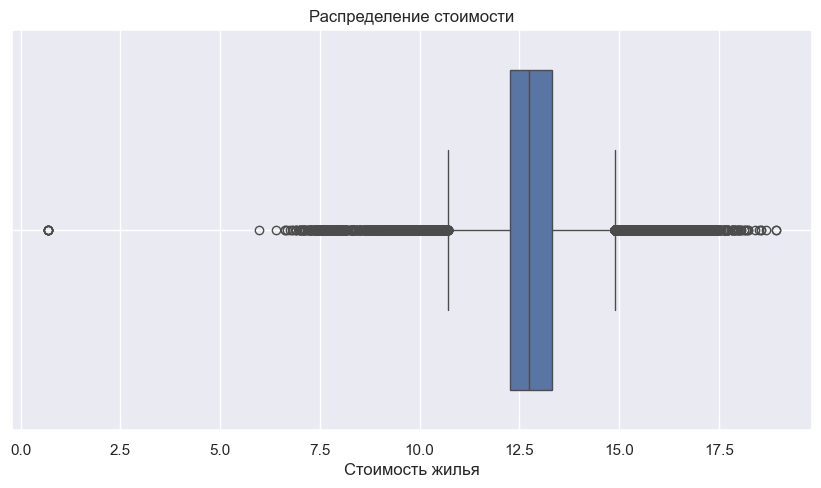

In [96]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=data, x='target_log', ax=ax) 
# задаём подпись к графику
ax.set_title('Распределение стоимости')
ax.set_xlabel('Стоимость жилья');
# задаём отображение сетки
ax.grid(True);

In [97]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

In [98]:
from scipy.stats import shapiro
alpha = 0.05

In [99]:
_, p = shapiro(data['target_log'])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.000
Данные не распределены нормально (мы отвергаем H0)


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Произведем исследование логарифмированных распределений на наличие выбросов с помощью метода z-отклонений (3ех сигм)

In [100]:
def d_z(data,q1, q2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 4)) #фигура + координатная плоскость
#Строим гистограмму
    sns.histplot(data=data, x=q1, ax=axes[0]);
#Строим гистограмму в логарифмическом масштабе
    sns.histplot(data=data, x=q2, ax=axes[1]);
#Добавляем вертикальные линии для среднего и 3ех стандартных отклонений влево и вправо от среднего
    axes[1].axvline(data[q2].mean(), color='k', lw=2)
    axes[1].axvline(data[q2].mean()+ 3 *data[q2].std(),
                   color='k', ls='--', lw=2)
    axes[1].axvline(data[q2].mean()- 3 *data[q2].std(),
                   color='k', ls='--', lw=2);

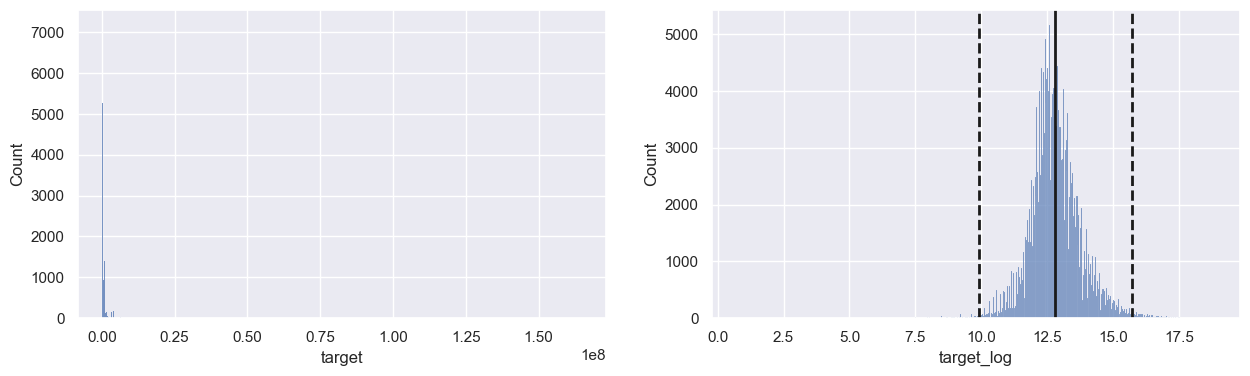

In [101]:

d_z(data, 'target','target_log')

Посмотрим на цену в зависимости от категориальных признаков

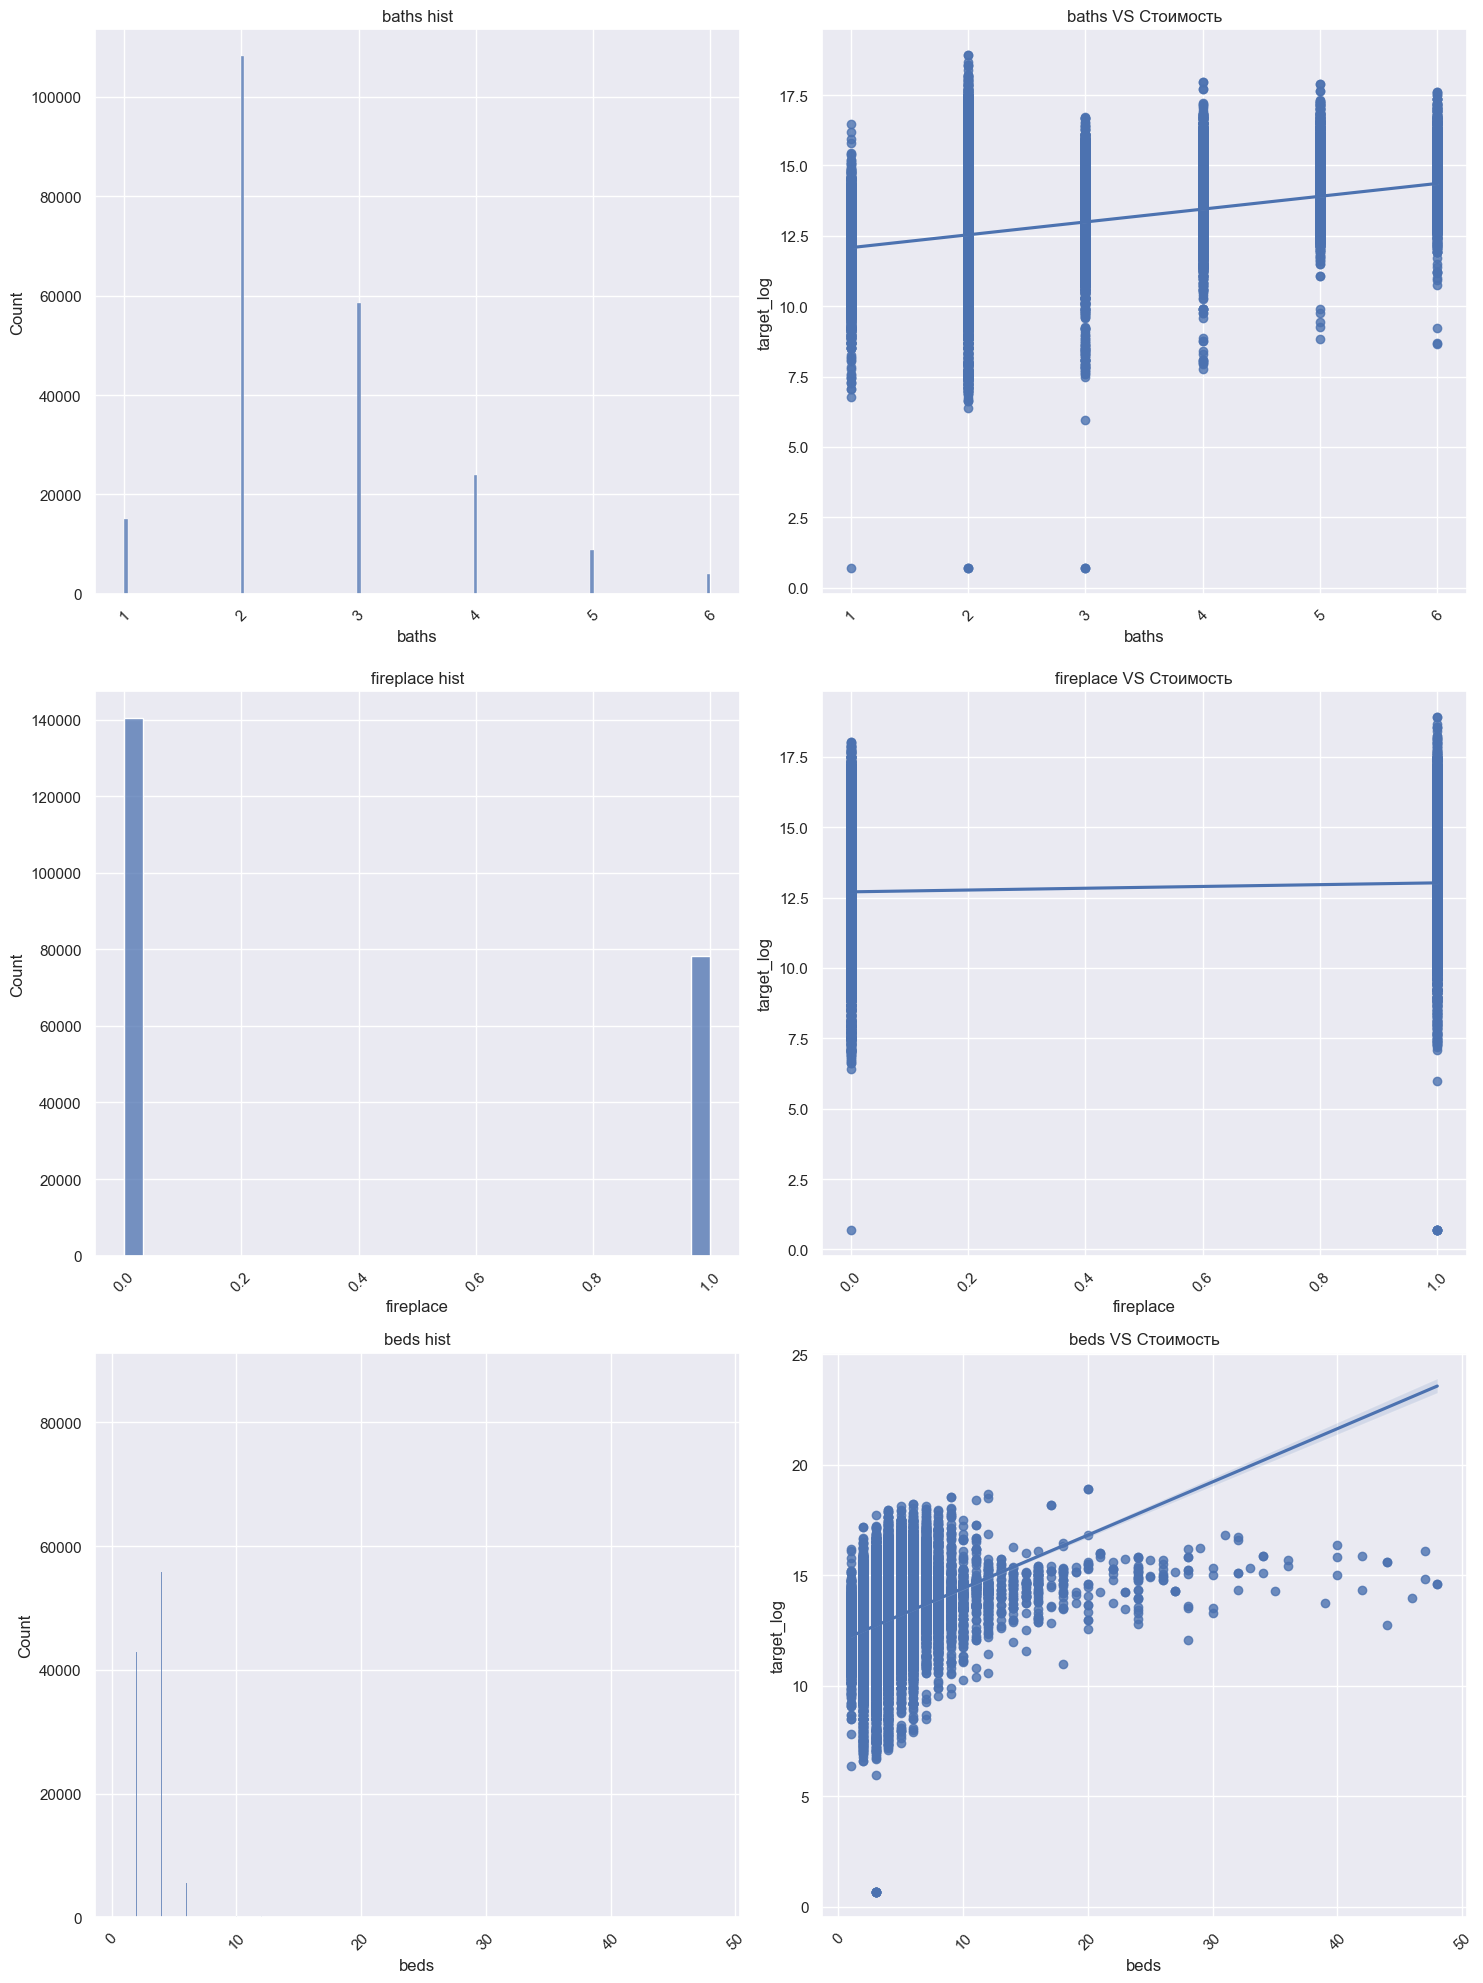

In [102]:
num_features = ['baths', 'fireplace', 'beds']
n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=data, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    regplot = sns.regplot(data=data, x=feature, y='target_log', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} VS Стоимость'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

In [103]:
data.value_counts()

status  propertyType  street                       baths  fireplace  city           sqft  zipcode  beds  state  stories  MlsId       target   pool  rat_min  rat_max  akr       price   target_log
sale    family        179 Pine Haven Dr            4      1          saintjohns     3399  32259    4     fl     2        1023872     538990   0     9        9        0.203880  159.0   13.197454     2
                      2810 Castlewood Dr NW        6      1          atlanta        3500  30327    5     ga     2        6588665     2000000  0     6        8        0.760000  571.0   14.508658     2
                      3901 W End Ave               2      0          nashville      1608  37205    2     tn     0        rtc2095059  199000   1     4        6        0.000000  124.0   12.201065     2
        townhouse     804 Blaylock Dr              3      0          dallas         2336  75203    3     tx     2        14197917    499900   0     3        5        0.094995  214.0   13.122165     2
     

## 4. Отбор и преобразование признаков

Избавимся от выбросов с помощью метода z-отклонений на логарифмированных признаках. 

In [104]:

#Объявляем функцию, реализующую фильтрацию выбросов по методу z-отклонений
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
#Производим очистку 
outliers, temp_cleaned = outliers_z_score(data, 'target_log', log_scale=False)
print('Shape before cleaning outliers: {}'.format(data.shape))
print('Shape after cleaning outliers: {}'.format(temp_cleaned.shape))
data = temp_cleaned

Shape before cleaning outliers: (218678, 19)
Shape after cleaning outliers: (215904, 19)


с учётом того, что у нас есть zipcode, штат и город - признак 'street' лишний

In [105]:
data = data.drop('street',axis=1) # удаляем столбец

посмотрим на связь стоимости, площади и цены

In [106]:
data['price_r'] = data['target'] / data['sqft']
data[['price', 'price_r']]

,price,price_r
0,144.0,144.137931
1,159.0,159.219312
2,965.0,965.000000
3,371.0,370.915286
5,233.0,232.998885
...,...,...
377175,156.0,156.250000
377179,564.0,563.867325
377180,311.0,310.928554
377181,337.0,337.499500


Можно сделать вывод, что это именно цена за 1 кв.фут. Значит это утечка данных

In [107]:
data[data['price'] == 0].shape

(1084, 19)

Убираем строки где цена равна 0

In [108]:
data = data[data['price'] != 0]

Признаки удаляем

In [109]:
data = data.drop( ['price', 'price_r'],axis=1)

Признаки 'fireplace' и 'pool' уже порядково закодированы.
Кодируем категориальные признаки 

In [110]:
train_data = data

In [111]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()

train_data['fireplace'] = train_data['fireplace'] .astype('object')
train_data['pool'] = train_data['pool'] .astype('object')

columns_to_change = ['status', 'propertyType','fireplace', 'pool']
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(train_data[columns_to_change]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)

['status_active' 'status_foreclosure' 'status_new' 'status_other'
 'status_pending' 'status_sale' 'propertyType_condhome'
 'propertyType_condo' 'propertyType_cooperative' 'propertyType_family'
 'propertyType_mobile' 'propertyType_other' 'propertyType_ranch'
 'propertyType_townhouse' 'fireplace_0' 'fireplace_1' 'pool_0' 'pool_1']


In [112]:
#Добавим полученную таблицу с закодированными признаками:

train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (214820, 31)


In [113]:
from sklearn.preprocessing import OrdinalEncoder
#from category_encoders.binary import BinaryEncoder

train_data['rat_min'] = train_data['rat_min'] .astype('object')
train_data['rat_max'] = train_data['rat_max'] .astype('object')
 
ordinal_encoder = OrdinalEncoder()
#columns_to_change = data[['city','zipcode',  'state','MlsId','baths', 'stories','akr']]
columns_to_change = ['city', 'state','MlsId']#, 'beds', 'baths', 'stories','rat_min', 'rat_max']

# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_ordinal = ordinal_encoder.fit_transform(data[columns_to_change])
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = ordinal_encoder.get_feature_names_out(columns_to_change)
print(column_names)

# Составляем DataFrame из закодированных признаков
data_ordinal = pd.DataFrame(data_ordinal, columns=column_names)

#Добавим полученную таблицу с закодированными признаками:

train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_ordinal], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

['city' 'state' 'MlsId']
Shape of data: (214820, 31)


рассмотрим варианты нормализации

In [114]:
def norm(data_n, n1, n2, title):
    fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
    ax1.set_title(title)
    sns.kdeplot(data_n[n1], ax=ax1, label = 'target')
    sns.kdeplot(data_n[n2], ax=ax1, label = 'target_log')
    plt.legend()

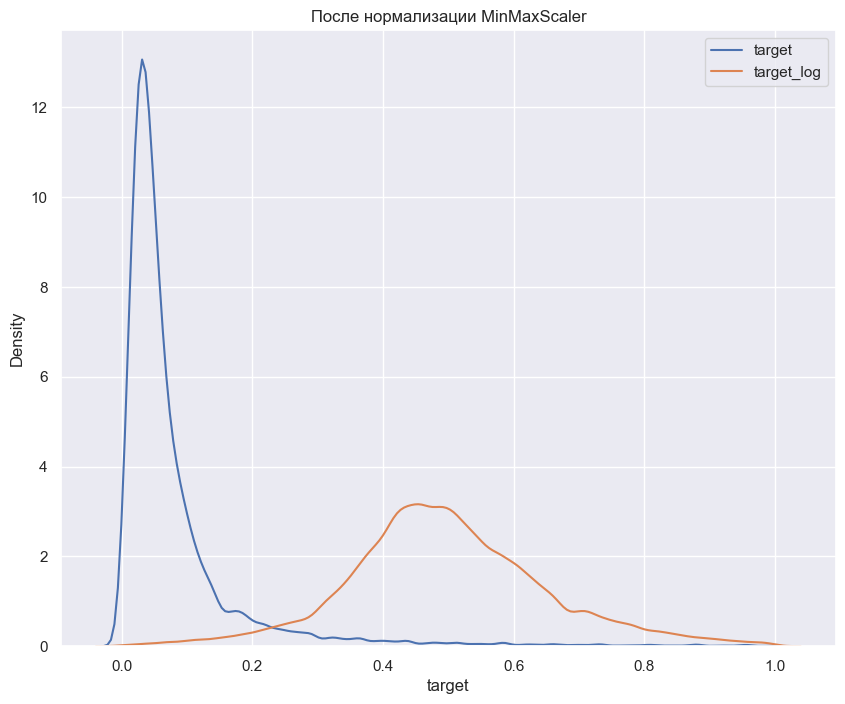

In [115]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(train_data)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=train_data.columns)

norm(df_mm, 'target','target_log', 'После нормализации MinMaxScaler')

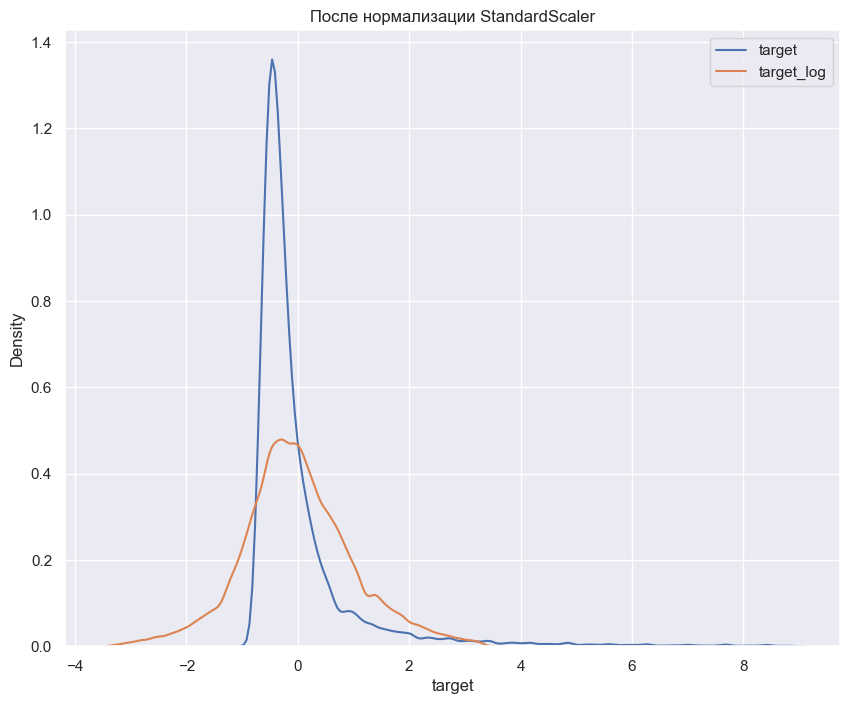

In [116]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(train_data)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=train_data.columns)

norm(df_s, 'target','target_log', 'После нормализации StandardScaler')


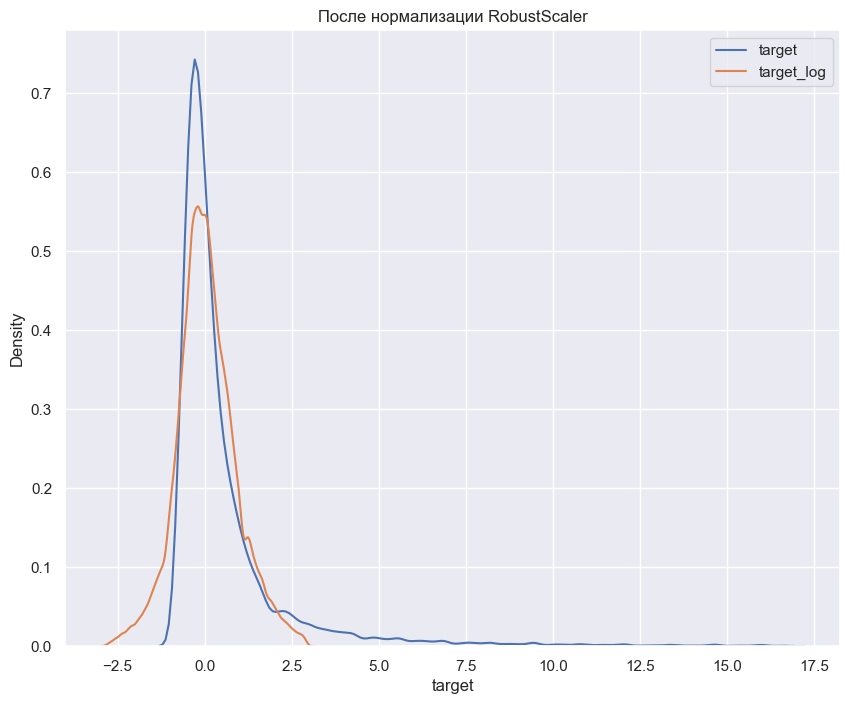

In [117]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(train_data)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=train_data.columns)

norm(df_r, 'target','target_log', 'После нормализации RobustScaler')

выбираем RobustScaler

Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака target и его логарифмированной версии target_log	:

<AxesSubplot: >

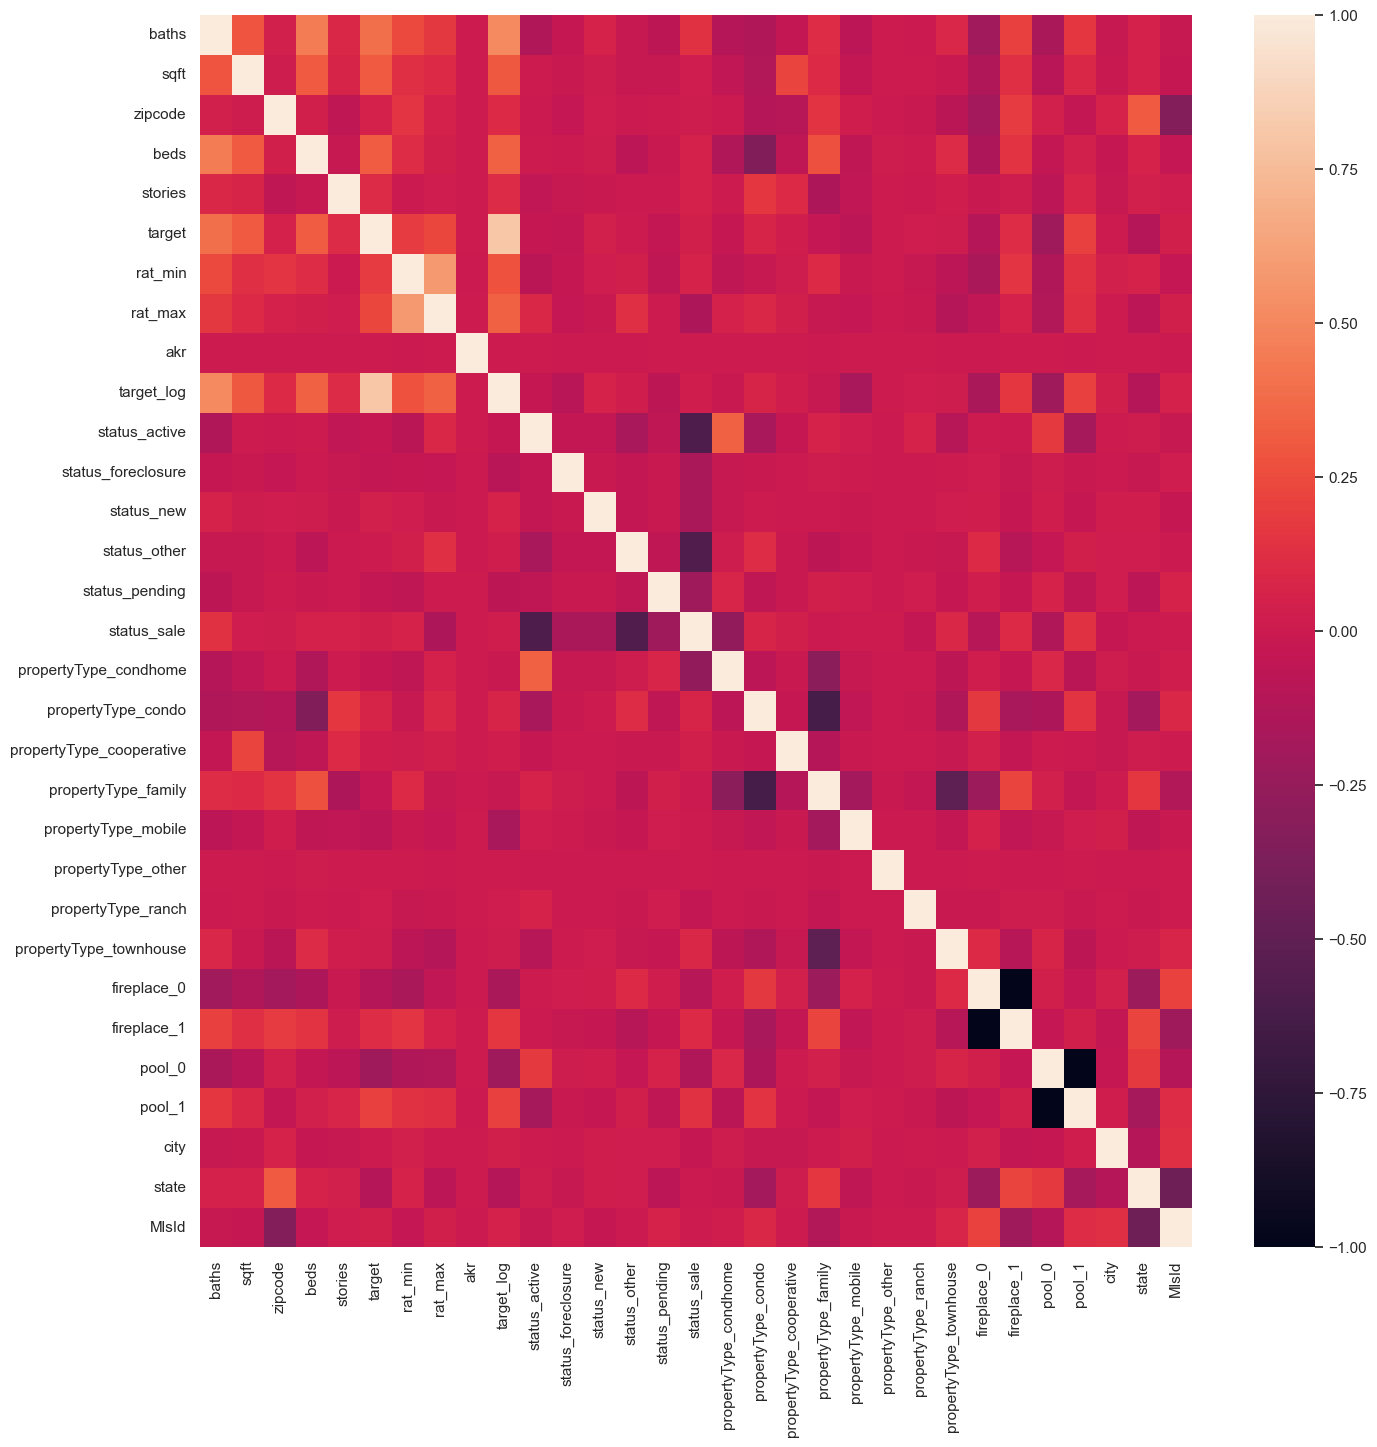

In [118]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(train_data.corr())

очень сильная корреляция между fireplace_0 и fireplace_. Также между pool_0 и pool_1. Оставляем по одному из них

In [119]:
train_data = train_data.drop(['fireplace_0', 'pool_0'], axis=1)

Посмотрим на итоговое распределение стоимости

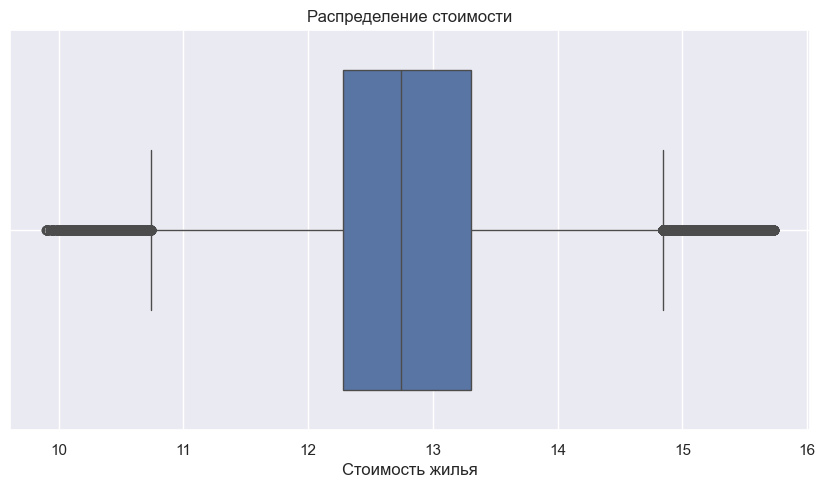

In [120]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=train_data, x='target_log', ax=ax) 
# задаём подпись к графику
ax.set_title('Распределение стоимости')
ax.set_xlabel('Стоимость жилья');
# задаём отображение сетки
ax.grid(True);

Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log

In [121]:
X = train_data.drop(['target', 'target_log'], axis=1)
y = train_data['target']
y_log = train_data['target_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Разобьем выборку на обучающую и валидационную в соотношении 75/25

In [122]:

X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
         X, y_log, 
         test_size=0.25, 
         random_state=42
        )

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.
С помощью SelectKBest отберем 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе

In [123]:
from sklearn.feature_selection import SelectKBest, f_regression
# с помощью SelectKBest отберите 25 наиболее подходящих признаков
X_new = SelectKBest(k=25, score_func = f_regression).fit(X_train, y_train_log)

#Получаем индексы выбранных признаков:
selected_features = X_new.get_support(indices=True)

#Извлекаем названия этих признаков:
selected_feature_names = X_train.columns[selected_features]

#выводим имена наиболее значимых признаков:
print(selected_feature_names)

Index(['baths', 'sqft', 'zipcode', 'beds', 'stories', 'rat_min', 'rat_max',
       'status_active', 'status_foreclosure', 'status_new', 'status_other',
       'status_pending', 'status_sale', 'propertyType_condhome',
       'propertyType_condo', 'propertyType_cooperative', 'propertyType_family',
       'propertyType_mobile', 'propertyType_ranch', 'propertyType_townhouse',
       'fireplace_1', 'pool_1', 'city', 'state', 'MlsId'],
      dtype='object')


In [124]:
X_train = X_train[selected_feature_names]
X_valid = X_valid[selected_feature_names]

<AxesSubplot: >

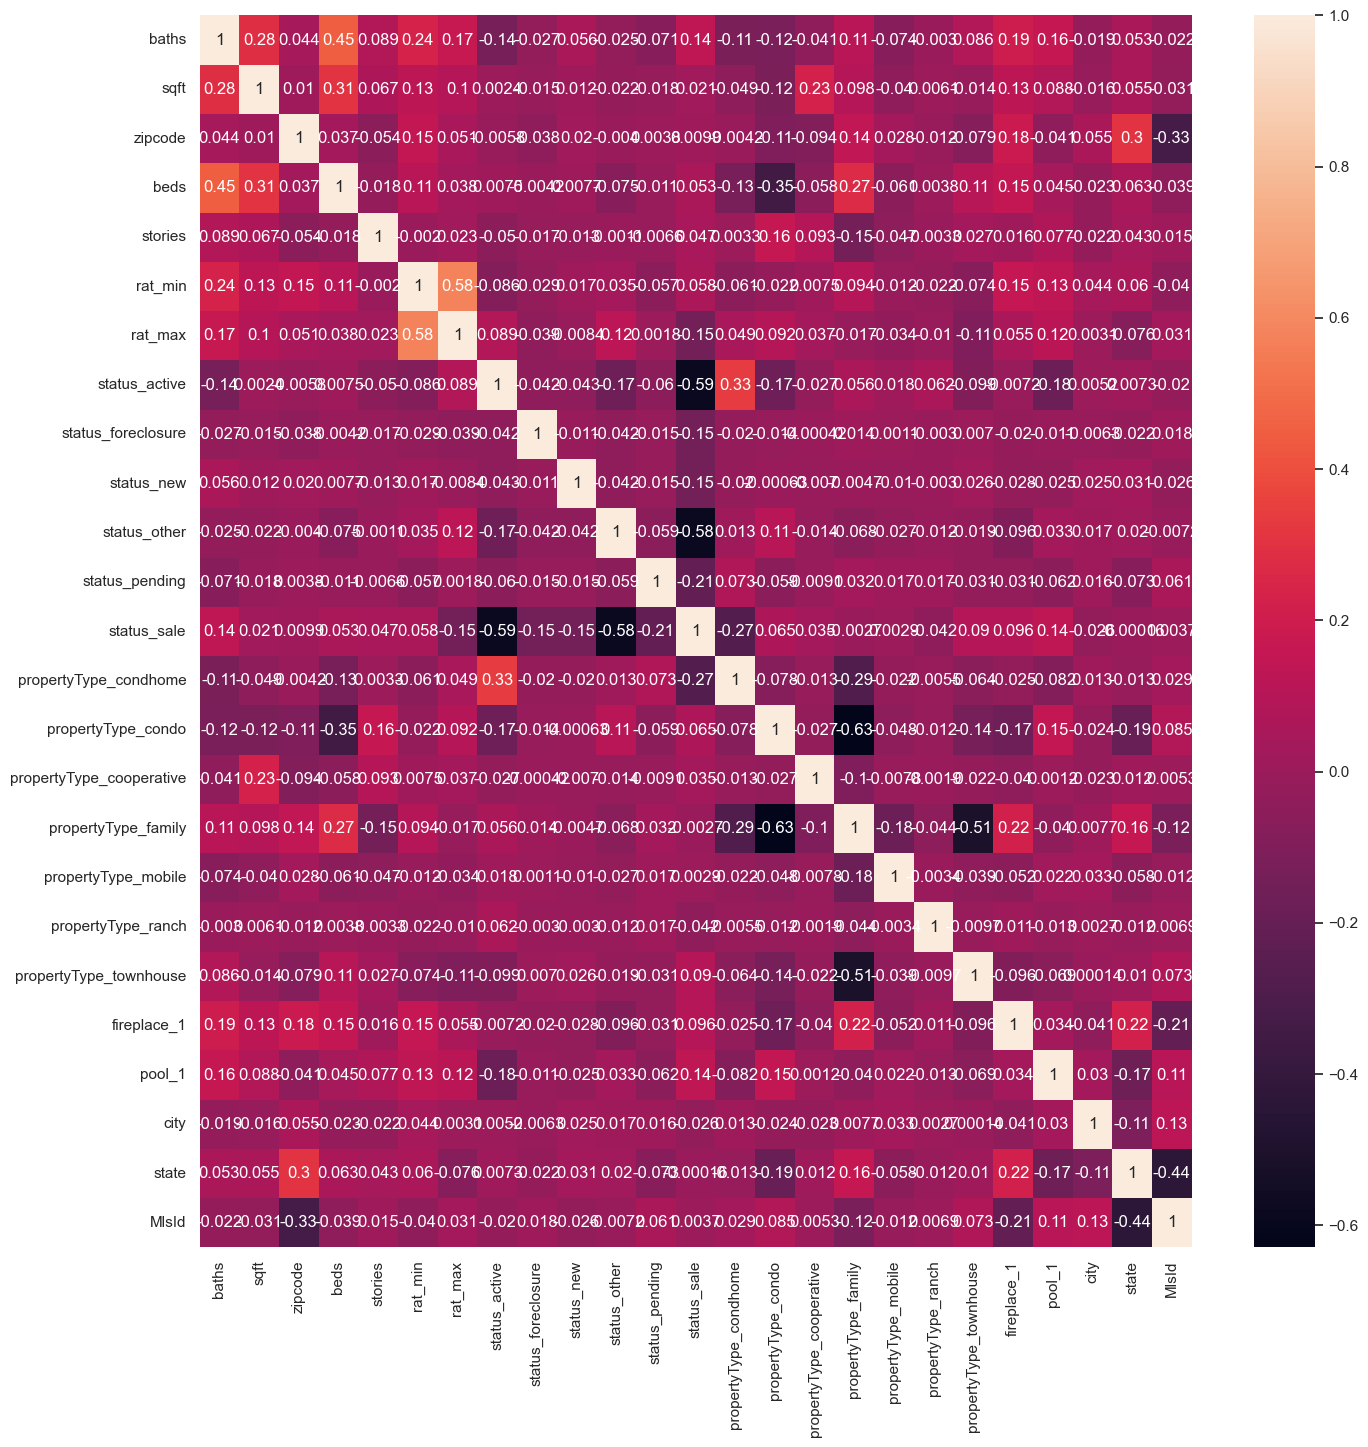

In [125]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(X_train.corr(), annot=True)

Корреляция в порядке. Самый высокий показатель по модулю - 0.63

Нормализуем предикторы в обучающей и валидационной выборках

In [126]:
# нормализуйте данные с помощью RobustScaler
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)


## 5. Решение задачи регрессии

Модель линейной регрессии 

In [127]:
from sklearn import metrics #метрики
#Создаём объект класса LinearRegression
lr = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr.fit(X_train_scaled, y_train_log)

#Делаем предсказание для каждой из выборок
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_valid_scaled)
#Выводим результирующие метрики
print('Метрики линейной регрессии')
print('RMSE score: {:.2f} '.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))))
print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))))
print('R2 score: {:.2f} '.format(metrics.r2_score(y_valid_log, y_test_pred)))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_valid_log, y_test_pred)))
print('MAPE score: {:.2f} '.format((metrics.mean_absolute_percentage_error(y_train_log, y_train_pred)*100)))
print('MAPE score: {:.2f} '.format((metrics.mean_absolute_percentage_error(y_valid_log, y_test_pred)*100)))


Метрики линейной регрессии
RMSE score: 0.66 
RMSE score: 0.66
R2 score: 0.44 
R2 score: 0.44
MAPE score: 3.90 
MAPE score: 3.91 


Модель полиномиальной регрессии 

In [128]:
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_valid_scaled)


#Создаём объект класса линейной регрессии
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_scaled_poly, y_train_log)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_scaled_poly)
print('Метрики полиномиальной регрессии')
print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict_poly))))
print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_test_predict_poly))))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_train_log, y_train_predict_poly)))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_valid_log, y_test_predict_poly)))
print('MAPE score: {:.2f}'.format((metrics.mean_absolute_percentage_error(y_train_log, y_train_predict_poly)*100)))
print('MAPE score: {:.2f}'.format((metrics.mean_absolute_percentage_error(y_valid_log, y_test_predict_poly)*100)))

Метрики полиномиальной регрессии
RMSE score: 0.52
RMSE score: 66783920.02
R2 score: 0.66
R2 score: -5701366804359824.00
MAPE score: 3.06
MAPE score: 5516528.08


Модель полиномиальной регрессии 2-ой степени с L2-регуляризацией

In [129]:
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_valid_scaled)


#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=1)
#Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)



#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)

print('Метрики полиномиальной регрессии 2-ой степени с L2-регуляризацией')
print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_predict_poly))))
print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_test_predict_poly))))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_train_log, y_train_predict_poly)))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_valid_log, y_test_predict_poly)))
print('MAPE score: {:.2f}'.format((metrics.mean_absolute_percentage_error(y_train_log, y_train_predict_poly)*100)))
print('MAPE score: {:.2f}'.format((metrics.mean_absolute_percentage_error(y_valid_log, y_test_predict_poly)*100)))

Метрики полиномиальной регрессии 2-ой степени с L2-регуляризацией
RMSE score: 0.52
RMSE score: 0.52
R2 score: 0.66
R2 score: 0.65
MAPE score: 3.06
MAPE score: 3.06


Модель дерева решений

In [130]:

clf = tree.DecisionTreeRegressor(random_state = 42)
clf = clf.fit(X_train_scaled, y_train_log)

#Делаем предсказание для каждой из выборок
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_valid_scaled)
#Выводим результирующие метрики

print('Метрики дерева решений')
print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))))
print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_test_pred))))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_train_log, y_train_pred)))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_valid_log, y_test_pred)))
print('MAPE score: {:.2f}'.format((metrics.mean_absolute_percentage_error(y_train_log, y_train_pred)*100)))
print('MAPE score: {:.2f}'.format((metrics.mean_absolute_percentage_error(y_valid_log, y_test_pred)*100)))

Метрики дерева решений
RMSE score: 0.00
RMSE score: 0.44
R2 score: 1.00
R2 score: 0.76
MAPE score: 0.00
MAPE score: 2.16


здесь недообучение модели

подберем параметры

In [131]:

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': range(7, 20)}

model_cv = GridSearchCV(tree.DecisionTreeRegressor(random_state=42),
                        parameters)


model_cv.fit(X_train_scaled, y_train_log)

print('Наилучшее значение параметров:{}'.format(model_cv.best_params_))

Наилучшее значение параметров:{'max_depth': 17}


Делаем на max_depth=17

In [132]:

clf = tree.DecisionTreeRegressor(max_depth=17, random_state = 42)
clf = clf.fit(X_train_scaled, y_train_log)

#Делаем предсказание для каждой из выборок
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_valid_scaled)

print('Метрики дерева решений с лучшим max_depth')
print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))))
print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_test_pred))))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_train_log, y_train_pred)))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_valid_log, y_test_pred)))
print('MAPE score: {:.2f}'.format((metrics.mean_absolute_percentage_error(y_train_log, y_train_pred)*100)))
print('MAPE score: {:.2f}'.format((metrics.mean_absolute_percentage_error(y_valid_log, y_test_pred)*100)))

Метрики дерева решений с лучшим max_depth
RMSE score: 0.30
RMSE score: 0.42
R2 score: 0.89
R2 score: 0.78
MAPE score: 1.56
MAPE score: 2.24


Модель случайного леса

In [133]:
from sklearn.ensemble import RandomForestRegressor

model_ran = RandomForestRegressor(n_estimators=200,
                                    max_depth=17,
                                  #  criterion='squared_error',
                                    min_samples_split=17,
                                    random_state=42)

model_ran.fit(X_train_scaled, y_train_log)


y_train_pred = model_ran.predict(X_train_scaled)
y_test_pred = model_ran.predict(X_valid_scaled)

print('Метрики случайного леса')
print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))))
print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_test_pred))))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_train_log, y_train_pred)))
print('R2 score: {:.2f}'.format(metrics.r2_score(y_valid_log, y_test_pred)))
print('MAPE score: {:.2f}'.format((metrics.mean_absolute_percentage_error(y_train_log, y_train_pred)*100)))
print('MAPE score: {:.2f}'.format((metrics.mean_absolute_percentage_error(y_valid_log, y_test_pred)*100)))

Метрики случайного леса
RMSE score: 0.30
RMSE score: 0.36
R2 score: 0.89
R2 score: 0.84
MAPE score: 1.69
MAPE score: 1.98


модель градиентного бустинга над деревьями решений

In [134]:
def d_grad(X_train_scaled, X_valid_scaled):
    from sklearn.ensemble import GradientBoostingRegressor

    model_gr = GradientBoostingRegressor(learning_rate=0.5,
                                        n_estimators=100,
                                        max_depth=6, 
                                        min_samples_split=30,
                                        random_state=42)

    model_gr.fit(X_train_scaled, y_train_log)


    y_train_pred = model_gr.predict(X_train_scaled)
    y_test_pred = model_gr.predict(X_valid_scaled)

    print('Метрики градиентного бустинга над деревьями решений')
    print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))))
    print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_test_pred))))
    print('R2 score: {:.2f}'.format(metrics.r2_score(y_train_log, y_train_pred)))
    print('R2 score: {:.2f}'.format(metrics.r2_score(y_valid_log, y_test_pred)))
    print('MAPE score: {:.2f}'.format((metrics.mean_absolute_percentage_error(y_train_log, y_train_pred)*100)))
    print('MAPE score: {:.2f}'.format((metrics.mean_absolute_percentage_error(y_valid_log, y_test_pred)*100)))
    return model_gr


In [135]:
model_grad = d_grad(X_train_scaled, X_valid_scaled)

Метрики градиентного бустинга над деревьями решений
RMSE score: 0.30
RMSE score: 0.33
R2 score: 0.88
R2 score: 0.86
MAPE score: 1.74
MAPE score: 1.88


# ВЫВОД: лучший результат дала модель градиентного бустинга над деревьями решений

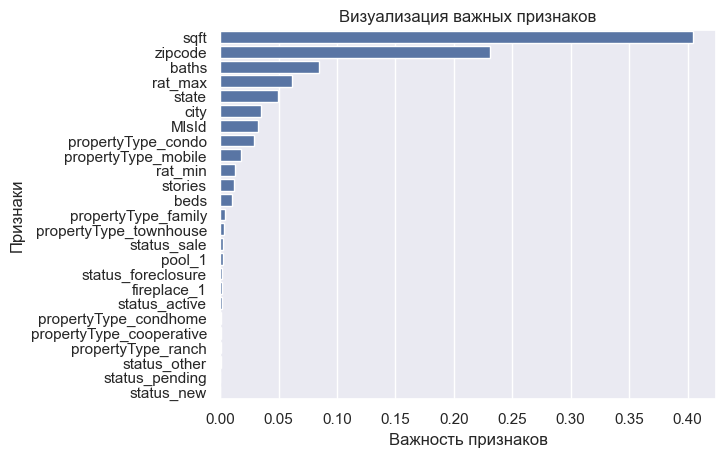

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_imp = pd.Series(model_ran.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Визуализация важных признаков')
plt.show()

In [137]:
feature_imp.index[:10]

Index(['sqft', 'zipcode', 'baths', 'rat_max', 'state', 'city', 'MlsId',
       'propertyType_condo', 'propertyType_mobile', 'rat_min'],
      dtype='object')

Обучим на 10 самых важных признаках

In [138]:
columns10 = feature_imp.index[:10]
X_train_10 = X_train[['sqft', 'zipcode', 'baths', 'rat_max', 'state', 'propertyType_condo',
       'city', 'MlsId', 'propertyType_mobile', 'stories']]
X_valid_10 = X_valid[['sqft', 'zipcode', 'baths', 'rat_max', 'state', 'propertyType_condo',
       'city', 'MlsId', 'propertyType_mobile', 'stories']]
# нормализуйте данные с помощью RobustScaler
scaler = preprocessing.RobustScaler()
scaler.fit(X_train_10)
X_train_scaled_10 = scaler.transform(X_train_10)
X_valid_scaled_10 = scaler.transform(X_valid_10)
model_best = d_grad(X_train_scaled_10, X_valid_scaled_10)

Метрики градиентного бустинга над деревьями решений
RMSE score: 0.32
RMSE score: 0.35
R2 score: 0.87
R2 score: 0.85
MAPE score: 1.82
MAPE score: 1.94


Здесь немного хуже. Оставим модель 'model_grad' - на всех признаках 

## 6. Сериализация и запись результата в файл формата pkl

In [139]:
# Производим сериализацию и записываем результат в файл формата pkl
with open('agapov.pkl', 'wb') as output:
    pickle.dump(model_grad, output)

In [140]:
# Производим десериализацию и извлекаем модель из файла формата pkl
with open('agapov.pkl', 'rb') as pkl_file:
    model_from_file = pickle.load(pkl_file)

model_from_file

GradientBoostingRegressor(learning_rate=0.5, max_depth=6, min_samples_split=30,
                          random_state=42)

In [141]:
# Проверяем, что все элементы массивов предсказаний совпадают между собой
all(model_grad.predict(X_train_scaled) == model_from_file.predict(X_train_scaled))

True